# ML takehome assignment Quinten Cabo
# 1 Classification of Facial Expressions

Python 3.9 is needed for this notebook!

### 1.1 Dataset
You will each receive individual npz files with different subsets of the original dataset (XXXXXXX face.npz, where XXXXXXX is your student ID). Your individual dataset comprises of grayscale images that contain faces that have been extracted from a variety of sources. The faces have been rotated, scaled and aligned to make the task easier. These faces have been labeled by experts and research assistants based on their expression. These expressions fall into one of three categories, labelled 0, 1 and 2. Note that each labelled face image has an identity, and there are different expressions associated with each person in the labelled set. Therefore to avoid having one person’s face in both training, validation and test sets, cross validation should not be used. The data set has been partitioned into training, testing and validation for you.

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore') 
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import time

np.random.seed(900)

In [2]:
# Loading the data
cwd = os.getcwd()

try:
    data_path = os.path.join(cwd, "data\ML_takehome")
except:
    print("Not a valid path :(")

X_train = np.load(os.path.join(data_path, "X_train.npy"))
X_test = np.load(os.path.join(data_path, "X_test.npy"))
X_valid = np.load(os.path.join(data_path, "X_valid.npy"))

y_train = np.load(os.path.join(data_path, "y_train.npy"))
y_test = np.load(os.path.join(data_path, "y_test.npy"))
y_valid = np.load(os.path.join(data_path, "y_valid.npy"))

from dataclasses import dataclass

@dataclass
class Data:
    """Represents train and test data in one object"""
    X_train: np.array
    X_test: np.array
    y_train: np.array
    y_test: np.array
    X_valid: np.array = None
    y_valid: np.array = None

data = Data(X_train, X_test, y_train, y_test, X_valid, y_valid)

### 1.2 Exploratory Data Analysis Tasks
1. (5 points) Using a subplot, display three images from the dataset, one from each category. Label these images according to their category.
    Marks breakdown:
    * 3 points for displaying each image with labels in a subplot.
    * 2 points for automatically finding which indexes in your data belong to each label.


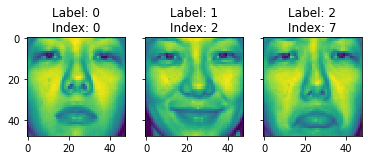

In [3]:
f, ax = plt.subplots(1, 3, sharey=True)
imgs = np.zeros([len(X_train), 48, 48])


def plot_img(X, ax, title, width=48, height=48):
    """Plot an image X with label y. The image will be reshaped to width*height"""
    img = X.reshape([width, height])
    ax.imshow(img, interpolation="nearest")
    ax.set_title(title)


def plot_catogories(X, y, ax, width=48, height=48):
    """Plot all the different catagories in an X."""
    found_catagories = set()
    for index, _X in enumerate(X):
        _y = y[index]
        if _y not in found_catagories:  # If the catagory is not in the set yet plot it and add it to the set
            plot_img(_X, ax[len(found_catagories)],
                     title=f"Label: {_y}\nIndex: {index}")
            found_catagories.add(_y)


plot_catogories(X_train, y_train, ax)

2. (5 points) Combine the target labels together in one array. Display your target class in a histogram. Is the dataset balanced?
    Marks breakdown:
    * 1 points for combining the target labels.
    * 3 points for display the histogram of the target classes with axis labelled and title included. 
    * 1 points for whether the dataset is balanced.

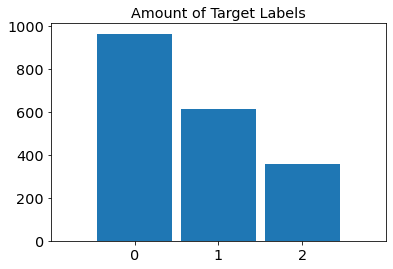

The dataset is not balanced at all. There are almost double the targets with label 0 vs targets with label 1. Likewise there are almost double the targets with label 1 vs label 2


In [4]:
labels = np.array(y_train, dtype=str)
np.append(labels, y_test)
np.append(labels, y_valid)

plt.hist(labels, bins=np.arange(5)-0.5, rwidth=0.9)
plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")
plt.xlim([-1, 3])
plt.title("Amount of Target Labels", fontsize="x-large")
plt.show()

print("The dataset is not balanced at all. There are almost double the targets with label 0 vs targets with label 1.",
      "Likewise there are almost double the targets with label 1 vs label 2")


### 1.3 Classification Tasks
1. (7 points) Train a k-nearest neighbour classifier (k = 1) with uniform weights. This classifier will be your baseline classifier. Marks breakdown:
    * 3 points for training and evaluating the accuracy of the KNN (with k = 1).
    * 2 points for displaying two mis-classified images for each class.
    * 1 points for providing other metrics (besdies accuracy) to evaluate this classifier.

Train score = 1.0
Test score = 0.7444933920704846
High train score and low test score indicates overfitting.
Precision: [0.73611111 0.89090909 0.5       ]

Recal:     [0.86885246 0.765625   0.34146341]

fscore:    [0.79699248 0.82352941 0.4057971 ]

Support:   [122  64  41]

The model took 0.0019779205322265625 seconds to run


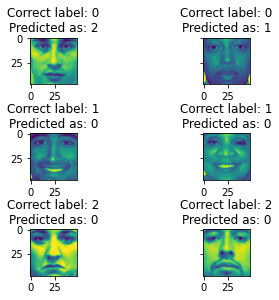

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier

t0 = time.time()

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

t1 = time.time()
total_time = t1 - t0

train_score = KNN.score(X_train, y_train)
test_score = KNN.score(X_test, y_test)

print(f"Train score = {train_score}\nTest score = {test_score}")
print("High train score and low test score indicates overfitting.")

y_pred = KNN.predict(X_valid)


def plot_wrong_image_predictions_per_catagory(X, y, y_pred, plots_per_label: int, width=48, height=48):
    differences = y == y_pred
    unique_labels = set(y)
    current_plot_index = 0

    f, ax = plt.subplots(len(unique_labels), plots_per_label, sharey=True)

    row = 0
    col = 0

    for target_label in unique_labels:

        for index, match in enumerate(differences):
            if not match and y[index] == target_label:
                img = X[index].reshape(width, height)
                ax[row][col].imshow(img)
                ax[row][col].set_title(
                    f"Correct label: {y[index]}\nPredicted as: {y_pred[index]}")
                current_plot_index += 1
                if col > plots_per_label - 2:
                    break
                col += 1
        row += 1
        col = 0

    f.tight_layout(pad=0.1)
    f.show()


plot_wrong_image_predictions_per_catagory(X_valid, y_valid, y_pred, 2)

def calcualte_precision_recall_fscore_support(model, data):
    model_predictions = model.predict(data.X_test)
    return precision_recall_fscore_support(data.y_test, model_predictions)

# Other evaluators:

presision, recall, fscore, support = calcualte_precision_recall_fscore_support(KNN, data)

print(f"Precision: {presision}\n")
print(f"Recal:     {recall}\n")
print(f"fscore:    {fscore}\n")
print(f"Support:   {support}\n")
print(f"The model took {total_time} seconds to run")

2. (3 points) Find the best hyperparameters (number of neighbours) for the knn classifier.


1..3..5..7..9..11..13..15..17..19..21..23..25..27..29..31..33..35..37..39..41..43..45..47..49..51..53..55..57..59..61..63..65..67..69..71..73..75..77..79..81..83..85..K 1 till 87 where checked with steps of 2
The best K was K=9
This K gave test score 0.75
Train score: 0.76


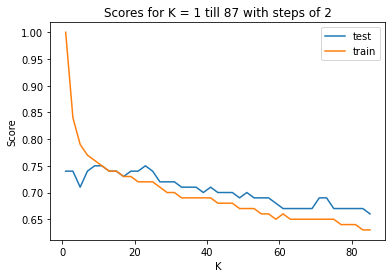

In [6]:
from collections import namedtuple

Result = namedtuple("Result", "k, train test")

results = []

highest_k_to_be_checked = int(len(X_train)**0.5*2)  # double of the sqaure of k
steps = 2

for k in range(1, highest_k_to_be_checked, steps):
    print(k, end='')
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    print(".", end='')
    train_score = KNN.score(X_train, y_train)
    test_score = KNN.score(X_test, y_test)
    print('.', end='')
    results.append(Result(k, round(train_score, 2), round(test_score, 2)))


# Find highest K
highest = results[0]
for result in results:
    if result.test > highest.test:
        highest = result

print(f"K 1 till {highest_k_to_be_checked} where checked with steps of {steps}\nThe best K was K={highest.k}")
print(f"This K gave test score {highest.test}\nTrain score: {highest.train}")


baseline_train = highest.train
baseline_test = highest.test

plt.figure()
plt.plot([result.k for result in results], [result.test for result in results], label="test")
plt.plot([result.k for result in results], [ result.train for result in results], label="train")

plt.legend()
plt.title(f"Scores for K = 1 till {highest_k_to_be_checked} with steps of {steps}")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()

3. (45 points) Create and train classifiers and apply preprocessing methods to beat the baseline classifier. You can compare many machine learning approaches including supervised learning methods (k-nearest neighbours, SVMs, kernel SVMs, etc ) and dimensionality reduction (PCA, etc.
.). Your solution does not have to be limited to simply applying machine learning models, as well. Marks breakdown:
    * 15 points for comparing at least 4 other (low-level) machine learning algorithms, searching for best hyperparameters and beating the baseline classifier. Choose one or two hyperparameters (if there are any) to search for. (2 points per algorithm, 1 point for finding the best hyperparameters (if any) for each algorithm, 1 point for beating the baseline classifier and 2 points for clean well structured code.)
    * 5 points for training and evaluating the models with Random Forests or Gradient Boosting.
    * 5 points for training and evaluating with a heterogeneous ensemble learner such as Voting.
    * 5 points for evaluating all classifiers with additional metrics (beyond accuracy), comparing the computational times of each classifier and describing the results in a table in your report.
    * 5 points for two dimensional reduction or feature selection techniques. You should justify the number of components selected.
    * 5 points for balancing the dataset with an appropriate data balancing technique.
    * 5 points for implementing additional solutions such as streamlining your code with functions or pipelines.

These are the hyperparameters I am going to try:
### Decision trees
- criterion 
- splitter 
- max_depth
- max_features

### Kernel Support Vector Machines
- c
- different kernels  

### Naive Bayes
- None

### Linear Support Vector Machines
- c

### Linear regression
- None

In [7]:
# Balancing the training data (Only run this cell once!)
from imblearn.under_sampling import RandomUnderSampler

Balancer = RandomUnderSampler(random_state=137)

X_train_rus, y_train_rus = Balancer.fit_resample(data.X_train, data.y_train)
print(f"Removed {len(data.X_train) - len(X_train_rus)} data points from the training set the balance the data")

Removed 862 data points from the training set the balance the data


In [8]:
# Replace old training data with balanced data
data.X_train = X_train_rus
data.y_train = y_train_rus

In [1]:
from sklearn.svm import SVC
from itertools import product
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


@dataclass
class Hyperparameter():
    """Represents a hyper parameter and what variables to try"""
    name: str
    values_to_try: list

    def as_dict(self):
        return {self.name: self.values_to_try}


def HyperparameterRange(name, start, end, step):
    """This function makes a Hyperparameter object with a range of values to try"""
    return Hyperparameter(name, range(start, end, step))


@dataclass
class BestHyperParameters:
    """Represents the best hyper parameter for a model and the scores it got with them"""
    parameters: dict
    train_score: float = 0.0
    test_score: float = 0.0
    valid_score: float = None
    total_time: int = None
    
    presision: list = None
    recall: list = None
    fscore: list = None
    support: list = None

    model = None
    
    def __repr__(self):
        model_name = self.model.__class__.__name__
        s = f"Best hyperparameters for the {model_name} model are:\n{self.parameters}\n"
        s += f"Train score: {self.train_score} Test score {self.test_score} Validation score {self.valid_score}\n"
        s += f"Precision:   {self.presision}\n"
        s += f"Recal:       {self.recall}\n"
        s += f"fscore:      {self.fscore}\n"
        s += f"Support:     {self.support}\n"
        s += f"The model took {self.total_time} seconds to run\n"
        return s

    def did_it_beat_baseline(self, baseline, verbose=True):
        '''True if the models test score is above the given baseline. Will also print this info if verbose'''
        # Pick valid score if available otherwise test score
        model_name = self.model.__class__.__name__
        my_score = self.test_score
        if self.valid_score and type(my_score) == float:
            my_score = self.valid_score
        
        if self.test_score > baseline:
            if verbose:
                print(f"The {model_name} model beat the baseline scores {self.test_score} > {baseline}!")
            return True
        else:
            if verbose:
                print(f"The {model_name} model did NOT beat the baseline {self.test_score} < {baseline}!")
            return False


def HyperIter(*args):
    """An iterator that will retun all possible combinations of Hyperparameter to try"""
    values_to_try = [arg.values_to_try for arg in args if type(arg) is Hyperparameter]
    kwarg = {}

    for values in product(*values_to_try):
        for index, value in enumerate(values):
            name = args[index].name
            kwarg[name] = value
        yield kwarg


def find_best_hyperparameters(Model, data, *args, **kwargs) -> BestHyperParameters:
    """A function that finds the best hyperparameters for a model"""
    best = BestHyperParameters({})
    # For loop with all combination of given hyperparameters

    for parameters in HyperIter(*args):
        # print(parameters) # uncomment to print paramets that are tried
        # Start timer
        t0 = time.time()
        
        # Make & fit the model
        model = Model(**parameters)
        model.fit(data.X_train, data.y_train)

        # End timer
        t1 = time.time()
        total_time = round(t1 - t0, 6)

        # Get train & test rounded
        train_score = round(model.score(data.X_train, data.y_train), 2)
        test_score = round(model.score(data.X_test, data.y_test), 2)
        
        # Check if the model beat the best model so far
        if best.test_score < test_score:
            
            best.test_score = test_score
            best.train_score = train_score
            best.parameters = parameters
            best.model = model
            best.total_time = total_time
    
    # Calculate validation score with validation data for best model 
    best.valid_score = round(best.model.score(data.X_valid, data.y_valid), 2)
    
    # Calculate precision recall fscore support of the best model
    best.presision, best.recall, best.fscore, best.support = calcualte_precision_recall_fscore_support(
        best.model, data)
    return best

NameError: name 'dataclass' is not defined

In [49]:
# Define the hyperparameters 
C = Hyperparameter("C", [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
gamma = Hyperparameter("gamma", ["scale", 0.001, 0.01, 0.1, 1, 10, 100])
kernels = Hyperparameter("kernel", ['poly', 'rbf', 'sigmoid'])

criterion = Hyperparameter("criterion", ["gini", "entropy"])
splitter = Hyperparameter("splitter", ["best", "random"])
max_depth = Hyperparameter("max_depth", [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14, 15, 16])
max_features = Hyperparameter("max_features", [1, 2, 3, 4, 5, "auto", "sqrt", "log2"])
ccp_alpha = Hyperparameter("ccp_alpha", [0.0, 0.01, 0.1, 0.2])

criterionBoosting = Hyperparameter("criterion", ["friedman_mse", "mse"])
n_estimators = Hyperparameter("n_estimators", [100, 150, 200])

random_state = Hyperparameter("random_state", [137])





In [42]:
# Run the models
print("Starting... (this one will take a while)")
best_tree = find_best_hyperparameters(DecisionTreeClassifier, data, criterion, splitter, max_depth, max_features, ccp_alpha)
print(best_tree)
     
best_K_SVC = find_best_hyperparameters(SVC, data, C, kernels)
print(best_K_SVC)

best_L_SVC = find_best_hyperparameters(LinearSVC, data, C) 
print(best_L_SVC )

best_NB = find_best_hyperparameters(GaussianNB, data)
print(best_NB)

# criterion, max_depth, max_features, random_state
best_Random_Forest = find_best_hyperparameters(RandomForestClassifier, data, n_estimators)
print(best_Random_Forest)

# max_depth, criterionBoosting, random_state
best_Gradient_boosting = find_best_hyperparameters(GradientBoostingClassifier, data, n_estimators,) 
print(best_Gradient_boosting)


Starting... (this one will take a while)
Best hyperparameters for the DecisionTreeClassifier model are:
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 16, 'max_features': 'log2', 'ccp_alpha': 0.2}
Train score: 0.73 Test score 0.74
Precision:   [0.74452555 0.86       0.55      ]
Recal:       [0.83606557 0.671875   0.53658537]
fscore:      [0.78764479 0.75438596 0.54320988]
Support:     [122  64  41]
The model took 0.07813 seconds to run

Best hyperparameters for the SVC model are:
{'C': 10000, 'kernel': 'sigmoid'}
Train score: 1.0 Test score 0.85
Precision:   [0.89565217 0.93442623 0.62745098]
Recal:       [0.8442623 0.890625  0.7804878]
fscore:      [0.86919831 0.912      0.69565217]
Support:     [122  64  41]
The model took 1.300996 seconds to run

Best hyperparameters for the LinearSVC model are:
{'C': 10000}
Train score: 1.0 Test score 0.88
Precision:   [0.92105263 0.9375     0.71428571]
Recal:       [0.86065574 0.9375     0.85365854]
fscore:      [0.88983051 0.9375    

KeyboardInterrupt: 

In [47]:
# Did it beat the the baseline? I got train 76 and test 75, we have to try with valid here ....
print(f"The baseline scores were test: {baseline_train} and train: {baseline_test}\n")

print(best_K_SVC)

best_tree.did_it_beat_baseline(baseline_test)
best_K_SVC.did_it_beat_baseline(baseline_test)
best_L_SVC.did_it_beat_baseline(baseline_test)
best_NB.did_it_beat_baseline(baseline_test) 

best_Gradient_boosting.did_it_beat_baseline(baseline_test)
best_Random_Forest.did_it_beat_baseline(baseline_test)

The baseline scores were test: 0.76 and train: 0.75

Best hyperparameters for the SVC model are:
{'C': 10000, 'kernel': 'sigmoid'}
Train score: 1.0 Test score 0.85
Precision:   [0.89565217 0.93442623 0.62745098]
Recal:       [0.8442623 0.890625  0.7804878]
fscore:      [0.86919831 0.912      0.69565217]
Support:     [122  64  41]
The model took 1.300996 seconds to run

The Decision tree model did NOT beat the baseline 0.74 < 0.75


AttributeError: 'BestHyperParameters' object has no attribute 'model_name'

In [46]:
# Run the voting classifier
from sklearn.ensemble import VotingClassifier

t0 = time.time()
estimators = [("linearSVC", best_L_SVC.model), ("SVC", best_L_SVC.model), ("DecisionTree", best_tree.model),("NB", best_NB.model)]
t1 = time.time()

total_time = t1 - t0

voting_model = VotingClassifier(estimators, voting='hard')
voting_model.fit(X_train, y_train)
print("Voting Train score: ", voting_model.score(X_train,y_train))
print("Voting Test score: ", voting_model.score(X_test,y_test))

calcualte_precision_recall_fscore_support(voting_model, data)

s = f"Precision:    {presision}\n"
s += f"Recal:       {recall}\n"
s += f"fscore:      {fscore}\n"
s += f"Support:     {support}\n"
s += f"The model took {total_time} seconds to run\n"
print(s)

Voting Test score:  0.7929515418502202


In [ ]:
## 5 points for training and evaluating with a heterogeneous ensemble learner such as Voting.
5 points for two dimensional reduction or feature selection techniques. You should justify the number of components selected.
5 points for balancing the dataset with an appropriate data balancing technique.

# 2  Regression to estimate the width of a grey kangaroo’s nose


You will create code to perform regression on a dataset from Australian Journal of Zoology, Vol. 28, p607-613 with Python libraries.

### 2.1 Dataset
The dataset consists of two continuous variables; the nasal length and nasal width (in mm) for male grey kangaroos.

In [15]:
# Load the data
csv_data = np.genfromtxt(data_path + '\kanga.csv', delimiter=',', skip_header=True)

### 2.2 Exploratory Data Analysis Tasks
1. (3 points) Present a scatterplot displaying the relationship between these two variables. Label the x axis as nasal length (mm) and y axis as nasal width (mm). Add a title to the scatterplot.

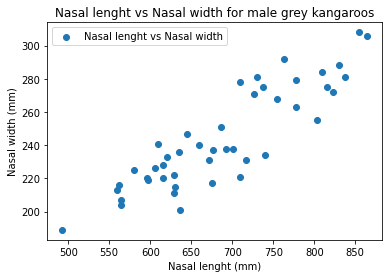

In [16]:
# Get x and y collums the arrays
X = csv_data[:, 0].reshape(-1, 1)  
y = csv_data[:,1]

# Make the scatter plot
plt.scatter(X, y, label=r"Nasal lenght vs Nasal width")
plt.xlabel("Nasal lenght (mm)")
plt.ylabel("Nasal width (mm)")
plt.title("Nasal lenght vs Nasal width for male grey kangaroos")
plt.legend()
plt.show()

### 2.3 Regression Tasks
1. (2 points) Split your dataset into 90% training and 10% testing.

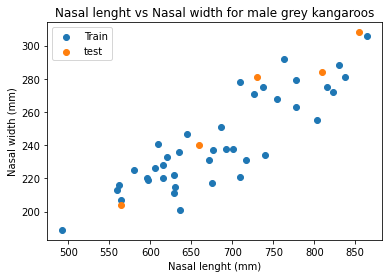

In [17]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=9)

data2 = Data(X_train2, X_test2, y_train2, y_test2)

plt.figure()
plt.scatter(X_train2, y_train2, label="Train")
plt.scatter(X_test2, y_test2, label="test")
plt.legend()
plt.xlabel("Nasal lenght (mm)")
plt.ylabel("Nasal width (mm)")
plt.title("Nasal lenght vs Nasal width for male grey kangaroos")

plt.show()

##### 2. (5 points) Linear fitting: Fit a linear regression model to the data. Evaluate how successful the fit is by computing the R2 score.

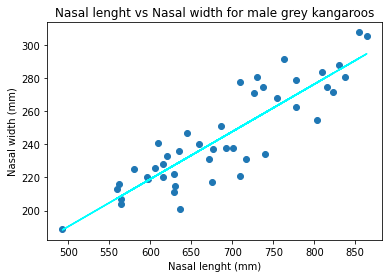

R2 is 0.777 

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


LR = LinearRegression()
LR.fit(X, y)

LR_y_prediction = LR.predict(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, LR_y_prediction, color="cyan")

plt.xlabel("Nasal lenght (mm)")
plt.ylabel("Nasal width (mm)")
plt.title("Nasal lenght vs Nasal width for male grey kangaroos")

plt.show()

# What is the R2 score?
r2 = round(r2_score(y, LR_y_prediction), 3)
print(f"R2 is {r2}", end=" ")

3. (3 points) Fit the linear regression model with cross validation and evaluate the mean R2 score.

In [23]:
r2_scores = cross_val_score(LR, X, y, scoring='r2')
mean_r2_linear_regression = round(np.mean(r2_scores), 3)
print(f"Cross validated R2 scores are {r2_scores}")
print(f"Mean R2 score is {mean_r2_linear_regression}")

print("\nI got 0.234, so not great. It is caused by one of the cross validated scores being -1.5.\nApperently one of the folds gives bad performance.")

Cross validated R2 scores are [ 0.61765389  0.63501709  0.90178865 -1.48731674  0.50294111]
Mean R2 score is 0.234

I got 0.234, so not great. It is caused by one of the cross validated scores being -1.5.
Apperently one of the folds gives bad performance.


4. (10 points) Using Grid Search and Cross Validation, compare the performance of regression analysis with SVM regression, and Decision Tree regression using the R2 score as a metric. Display your solutions in a plot.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

svr_grid_params = C.as_dict() | gamma.as_dict()
tree_grid_params = max_depth.as_dict() | max_features.as_dict() | ccp_alpha.as_dict()

svr_grid = GridSearchCV(SVR(), svr_grid_params, verbose=1, scoring="r2")
tree_grid = GridSearchCV(DecisionTreeRegressor(), tree_grid_params, verbose=1, scoring="r2")

svr_grid.fit(X_train2, y_train2)
tree_grid.fit(X_train2, y_train2)

svc_score = svr_grid.score(X_test2, y_test2)
tree_score = tree_grid.score(X_test2, y_test2)

print(f"SVR R2 score: {svc_score}")
print(f"Decision Tree R2 score: {tree_score}")



Fitting 5 folds for each of 56 candidates, totalling 280 fits
Fitting 5 folds for each of 544 candidates, totalling 2720 fits
SVR R2 score: 0.8263714037271093
Decision Tree R2 score: 0.8645928703009178


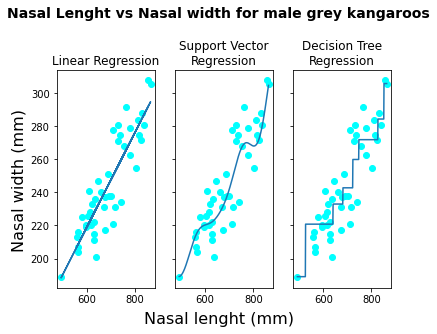

In [36]:
fig, ax = plt.subplots(1,3, sharey=True)
fig.suptitle('Nasal Lenght vs Nasal width for male grey kangaroos', fontsize=1, y=1.15, fontweight="bold")

fig.text(0.5, 0.00, 'Nasal lenght (mm)', ha='center', fontsize=16)
fig.text(0.02, 0.5, 'Nasal width (mm)', va='center', rotation='vertical', fontsize=16)

for plot in ax:
    plot.scatter(X, y, color="cyan")
    
ax[0].plot(X, LR_y_prediction, label="Linear Regression")
ax[0].set_title("Linear Regression")

# Make predictions for svr and tree
x_axis = np.arange(np.min(X), np.max(X)).reshape(-1, 1)
svr_y_predict = svr_grid.predict(x_axis)
tree_y_predict = tree_grid.predict(x_axis)

ax[1].plot(x_axis, svr_y_predict, label="Support Vector Regression")
ax[1].set_title("Support Vector\nRegression")

ax[2].plot(x_axis, tree_y_predict, label="Decision Tree Regression")
ax[2].set_title("Decision Tree\nRegression")

plt.show()

5. (2 points) Select the best performing regression model.

In [37]:
# Select the best performing regression model based of the R2 score
if svr_score > mean_r2_linear_regression and svr_score > tree_score:
     print("The Support Vector Regression model performed the best!")
elif tree_score > mean_r2_linear_regression and tree_score > svr_score:
     print("The Decision tree model performed the best!")
else:
     print("The Linear regression model performed the best!")

The Decision tree model performed the best!


### 2.4 Missing Data Imputation Task
1. (10 points) In your individual file XXXXXXX nose.csv (where XXXXXXX is your student ID), some variables are labelled with NaN. There variables are considered missing data. Perform a mean and a kNN (k = 3) data imputation. Compare the performance of a linear regression model with the two different data imputations.

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Load the data
filename = "2042647_nose.csv"
csv_nose_data = np.genfromtxt(data_path + "\\" + filename, delimiter=",", skip_header=True)

# Impute with KNN k = 3
imp_KNN = KNNImputer(n_neighbors=3).fit(csv_nose_data)
nose_imputed_KNN = imp_KNN.fit_transform(csv_nose_data)
X_nose_KNN = nose_imputed_KNN[:, 1].reshape(-1, 1)
y_nose_KNN = nose_imputed_KNN[:, 2]

LR_KNN = LinearRegression().fit(X_nose_KNN, y_nose_KNN)

# Impute with mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(csv_nose_data)
nose_imputed_mean = imp_mean.fit_transform(csv_nose_data)
X_nose_mean = nose_imputed_mean[:, 1].reshape(-1, 1)
y_nose_mean = nose_imputed_mean[:, 2]
LR_mean = LinearRegression().fit(X_nose_mean, y_nose_mean)

# Get R2 scores
r2_score_mean = round(r2_score(y_nose_mean, LR_KNN.predict(X_nose_mean)), 3)
r2_score_KNN = round(r2_score(y_nose_KNN, LR_mean.predict(X_nose_KNN)), 3)

# Print results
print(f"Mean imputation had an R2 score of {r2_score_mean}")
print(f"KNN imputation with k = 3 had an R2 score of {r2_score_KNN}\n")

if r2_score_mean > r2_score_KNN:
    print("Mean imputation gave the best performance")
else:
    print("KNN imputation with k = 3 gave the best performance")

Mean imputation had an R2 score of 0.617
KNN imputation with k = 3 had an R2 score of 0.7

KNN imputation with k = 3 gave the best performance
